# Arrest data tells a story

I decided to make a slide presentation to portray the most important and clear conclusions of my analysis to a non-technical audience (such as individuals within the criminal justice or prison systems).  This notebook is not in complete, polished, presentation format, but in case it is useful to see some of the code and analysis behind the slide presentation, I wanted to also provide this as additional information.

## Table of contents:
1. [About](#first-bullet)     
     1.1. [About the data](#2)    
     1.2. [Metadata](#3)    
     1.3. [Notes](#4)    
2. [Preparations](#second-bullet)    
3. [Data cleaning](#5)
4. [Initial impressions](#third-bullet)    
     4.1. [Summary statistics](#fourth-bullet)   
     4.2. [Checks per group](#fifth-bullet)  
5. [Summary](#thirteenth-bullet)   


# 1.  About the data

## 1.1.  Background <a class="anchor" id="2"></a>

My data storytelling is examining the dataset titled "Marijuana Arrests in Toronto: Race, Release, and Policing (1997-2002)" from Kaggle.com.

[Dataset on Kaggle](https://www.kaggle.com/datasets/utkarshx27/arrests-for-marijuana-possession/   '"Marijuana Arrests in Toronto: Race, Release, and Policing (1997-2002)" dataset from Kaggle')

As part of a larger dataset, this information was originally made public in the Toronto Star newspaper.  This data is within public domain, and Kaggle received it from personal communication from Michael Friendly at York University.

## 1.2.  Metadata given with the dataset: <a class="anchor" id="3"></a>

**Description**
Data on police treatment of individuals arrested in Toronto for simple possession of small quantities of marijuana. The data are part of a larger data set featured in a series of articles in the Toronto Star newspaper.

**Format**
A data frame with 5226 observations on the following 8 variables.

**released**
Whether or not the arrestee was released with a summons; a factor with levels: No; Yes.

**colour**
The arrestee's race; a factor with levels: Black; White.

**year**
1997 through 2002; a numeric vector.

**age**
in years; a numeric vector.

**sex**
a factor with levels: Female; Male.

**employed**
a factor with levels: No; Yes.

**citizen**
a factor with levels: No; Yes.

**checks**
Number of police data bases (of previous arrests, previous convictions, parole status, etc. – 6 in all) on which the arrestee's name appeared; a numeric vector

## 1.3.  Note <a class="anchor" id="4"></a>

#### \** A note about race, color, social awareness, and cultural sensitivity:  <span style="font-weight:normal"> I have concerns about using data from this dataset to examine race without additional information.  While the category labeled as "colour" is described as "the arrestee's race" in the metadata, it is unclear to me how this distinction was determined, who was included in each category, who chose the classification for each individual, and whether or to what extent these labels were appropriate for each of the arrestees.  However, as I am using only this dataset, I will move ahead and see what might be learned from it, while also recognizing many possible flaws in categorization of race in this set.  I ask that you also keep this in mind as you examine and interpret the story the data tells. </span>

For more on racial sensitvity in data science:   
* [Racial equity awareness](https://policyviz.com/2020/09/16/applying-racial-equity-awareness-in-data-visualization/  'Racial equity awareness in data visualization')   
* [Race and data science](https://datascience.columbia.edu/news/2021/making-a-commitment-to-critical-discussions-on-race-and-data-science/  'Critical discussions on race and data science')   
* [Race in health data](https://towardsdatascience.com/race-and-ethnicity-in-data-science-138acf1c23b4  'Race and ethnicity in health data science')


## 2. Prep <a class="anchor" id="second-bullet"></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from matplotlib.pyplot import figure
import numpy as np

In [3]:
arrests = pd.read_excel ("arrests.xlsx", index_col=0)

In [4]:
arrests.head()

,released,colour,year,age,sex,employed,citizen,checks
1,Yes,White,2002,21,Male,Yes,Yes,3
2,No,Black,1999,17,Male,Yes,Yes,3
3,Yes,White,2000,24,Male,Yes,Yes,3
4,No,Black,2000,46,Male,Yes,Yes,1
5,Yes,Black,1999,27,Female,Yes,Yes,1


# 3. Data cleaning <a class="anchor" id="5"></a>

In [5]:
na_arrests = arrests[arrests.isna().any(axis=1)]
na_arrests

,released,colour,year,age,sex,employed,citizen,checks


In [8]:
arrests.dtypes

released    object
colour      object
year         int64
age          int64
sex         object
employed    object
citizen     object
checks       int64
dtype: object

In [11]:
pd.Series({c: arrests[c].unique() for c in arrests})

released                                            [Yes, No]
colour                                         [White, Black]
year                     [2002, 1999, 2000, 1998, 2001, 1997]
age         [21, 17, 24, 46, 27, 16, 40, 34, 23, 30, 18, 4...
sex                                            [Male, Female]
employed                                            [Yes, No]
citizen                                             [Yes, No]
checks                                  [3, 1, 0, 4, 2, 5, 6]
dtype: object

In [12]:
arrests.shape

(5226, 8)

In [4]:
arrests.describe()

,year,age,checks
count,5226.000000,5226.000000,5226.000000
mean,1999.509376,23.846537,1.636433
std,1.390056,8.316133,1.539230
min,1997.000000,12.000000,0.000000
25%,1998.000000,18.000000,0.000000
50%,2000.000000,21.000000,1.000000
75%,2001.000000,27.000000,3.000000
max,2002.000000,66.000000,6.000000


In [13]:
arrests.value_counts()

released  colour  year  age  sex   employed  citizen  checks
Yes       White   2000  18   Male  Yes       Yes      0         37
                        17   Male  Yes       Yes      0         37
                  1999  19   Male  Yes       Yes      0         34
                  2001  18   Male  Yes       Yes      0         30
                  1999  17   Male  Yes       Yes      0         29
                                                                ..
          Black   1999  19   Male  Yes       No       6          1
                                             Yes      1          1
                                                      4          1
                        20   Male  No        No       0          1
          White   2002  56   Male  Yes       Yes      0          1
Length: 2879, dtype: int64

So far, there are no clear concerns about this dataset that need to be cleaned before proceeding.  As I examine the data further, I may discover inconsistencies or concerns, but as of now, everything looks ok.

# 4. Initial impressions <a class="anchor" id="third-bullet"></a>

## 4.1.  Number of checks by groups

I examined the summary statistics based on various conditions.  From this, I discovered a few areas I may examine more.  * The groups of prisoners with the highests average number of checks were those who were unemployed, black, and male.  Employment status, average age, and year arrested for all groups appear similar.

In [5]:
arrests[arrests["colour"]=="Black"].describe()

,year,age,checks
count,1288.000000,1288.000000,1288.000000
mean,1999.520186,24.825311,2.099379
std,1.440742,8.597161,1.525560
min,1997.000000,13.000000,0.000000
25%,1998.000000,19.000000,1.000000
50%,2000.000000,22.000000,2.000000
75%,2001.000000,28.000000,3.000000
max,2002.000000,66.000000,6.000000


In [6]:
arrests[arrests["colour"]=="White"].describe()

,year,age,checks
count,3938.000000,3938.000000,3938.000000
mean,1999.505841,23.526409,1.485018
std,1.373242,8.197922,1.513433
min,1997.000000,12.000000,0.000000
25%,1998.000000,18.000000,0.000000
50%,2000.000000,21.000000,1.000000
75%,2001.000000,27.000000,3.000000
max,2002.000000,64.000000,6.000000


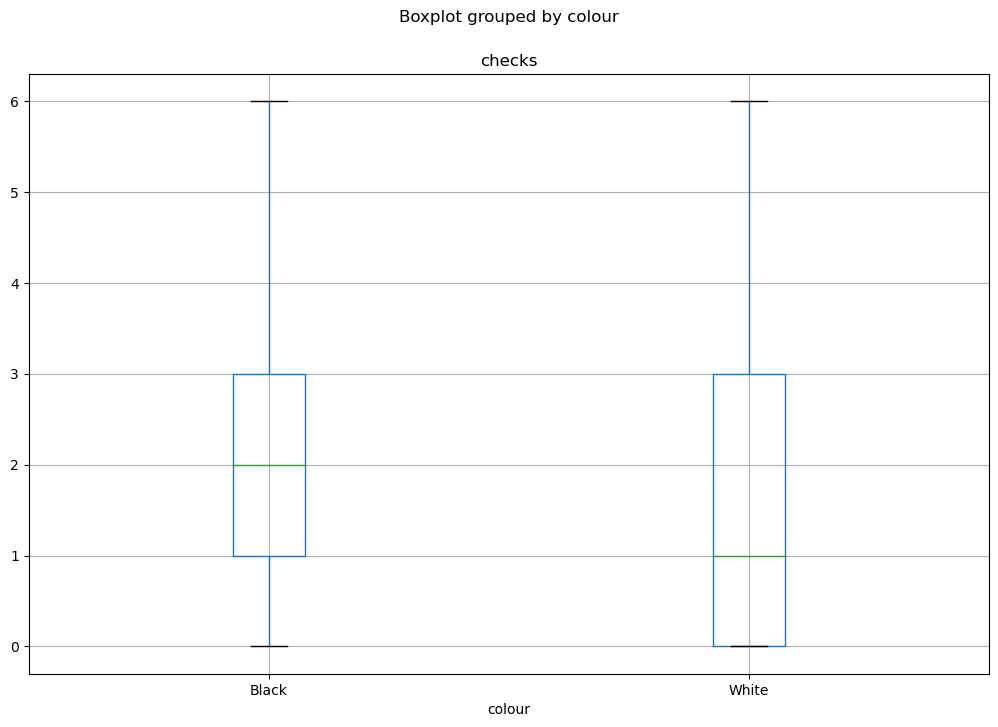

In [14]:
arrests.boxplot('checks', by='colour', figsize=(12, 8))
plt.show()

In [7]:
arrests[arrests["sex"]=="Female"].describe()

,year,age,checks
count,443.000000,443.000000,443.000000
mean,1999.419865,23.532731,1.092551
std,1.331744,8.605254,1.421558
min,1997.000000,13.000000,0.000000
25%,1998.000000,17.000000,0.000000
50%,1999.000000,20.000000,0.000000
75%,2000.500000,28.000000,2.000000
max,2002.000000,53.000000,5.000000


In [8]:
arrests[arrests["sex"]=="Male"].describe()

,year,age,checks
count,4783.000000,4783.000000,4783.000000
mean,1999.517667,23.875601,1.686807
std,1.395177,8.289172,1.540125
min,1997.000000,12.000000,0.000000
25%,1998.000000,18.000000,0.000000
50%,2000.000000,21.000000,1.000000
75%,2001.000000,27.000000,3.000000
max,2002.000000,66.000000,6.000000


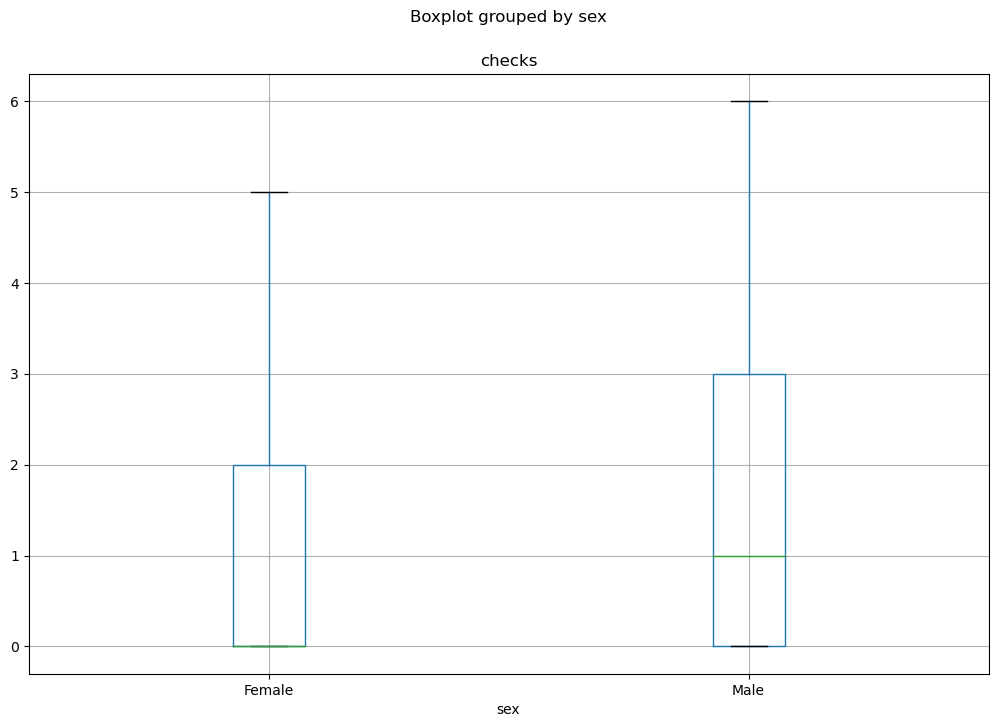

In [15]:
arrests.boxplot('checks', by='sex', figsize=(12, 8))
plt.show()

In [9]:
arrests[arrests["citizen"]=="Yes"].describe()

,year,age,checks
count,4455.000000,4455.000000,4455.000000
mean,1999.661055,23.595062,1.614590
std,1.282170,8.164336,1.523595
min,1997.000000,12.000000,0.000000
25%,1999.000000,18.000000,0.000000
50%,2000.000000,21.000000,1.000000
75%,2001.000000,27.000000,3.000000
max,2002.000000,66.000000,6.000000


In [10]:
arrests[arrests["citizen"]=="No"].describe()

,year,age,checks
count,771.000000,771.000000,771.000000
mean,1998.632944,25.299611,1.762646
std,1.643216,9.013251,1.621913
min,1997.000000,12.000000,0.000000
25%,1997.000000,19.000000,0.000000
50%,1998.000000,22.000000,2.000000
75%,2000.000000,30.000000,3.000000
max,2002.000000,64.000000,6.000000


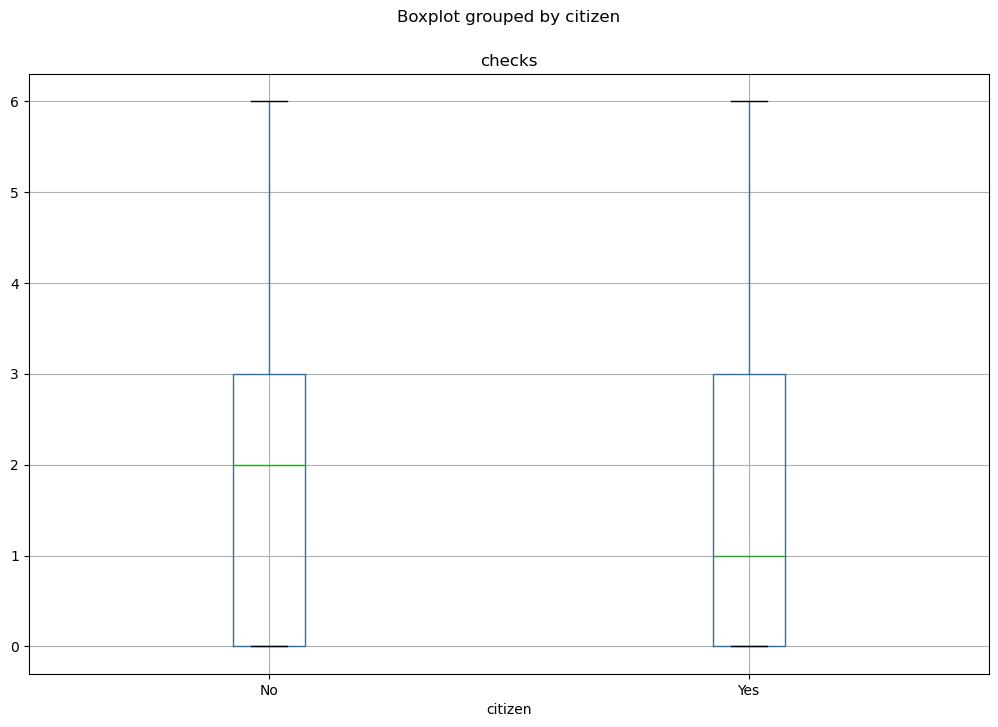

In [16]:
arrests.boxplot('checks', by='citizen', figsize=(12, 8))
plt.show()

In [11]:
arrests[arrests["employed"]=="Yes"].describe()

,year,age,checks
count,4111.000000,4111.000000,4111.000000
mean,1999.531258,23.341279,1.441742
std,1.370681,8.098965,1.487809
min,1997.000000,12.000000,0.000000
25%,1998.000000,18.000000,0.000000
50%,2000.000000,21.000000,1.000000
75%,2001.000000,26.000000,3.000000
max,2002.000000,66.000000,6.000000


In [12]:
arrests[arrests["employed"]=="No"].describe()

,year,age,checks
count,1115.00000,1115.000000,1115.000000
mean,1999.42870,25.709417,2.354260
std,1.45707,8.829314,1.513277
min,1997.00000,13.000000,0.000000
25%,1998.00000,19.000000,1.000000
50%,1999.00000,22.000000,3.000000
75%,2001.00000,30.500000,4.000000
max,2002.00000,62.000000,6.000000


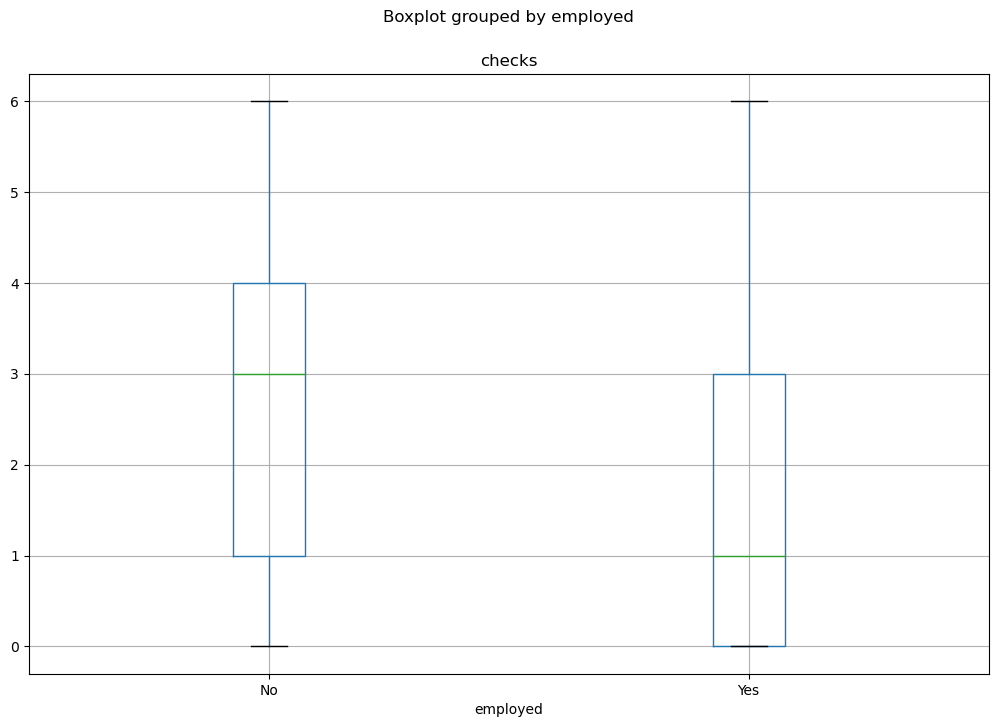

In [17]:
arrests.boxplot('checks', by='employed', figsize=(12, 8))
plt.show()

In [13]:
arrests[(arrests["employed"]=="No") & (arrests["colour"]=="Black")].describe()

,year,age,checks
count,377.000000,377.000000,377.000000
mean,1999.352785,25.668435,2.580902
std,1.456898,8.868956,1.441946
min,1997.000000,14.000000,0.000000
25%,1998.000000,19.000000,1.000000
50%,1999.000000,23.000000,3.000000
75%,2001.000000,29.000000,4.000000
max,2002.000000,59.000000,6.000000


In [14]:
arrests[(arrests["employed"]=="No") & (arrests["colour"]=="Black") & (arrests["sex"]=="Male")].describe()

,year,age,checks
count,352.000000,352.000000,352.000000
mean,1999.363636,25.454545,2.627841
std,1.453412,8.750299,1.432476
min,1997.000000,14.000000,0.000000
25%,1998.000000,19.000000,2.000000
50%,1999.000000,22.000000,3.000000
75%,2001.000000,28.000000,4.000000
max,2002.000000,59.000000,6.000000


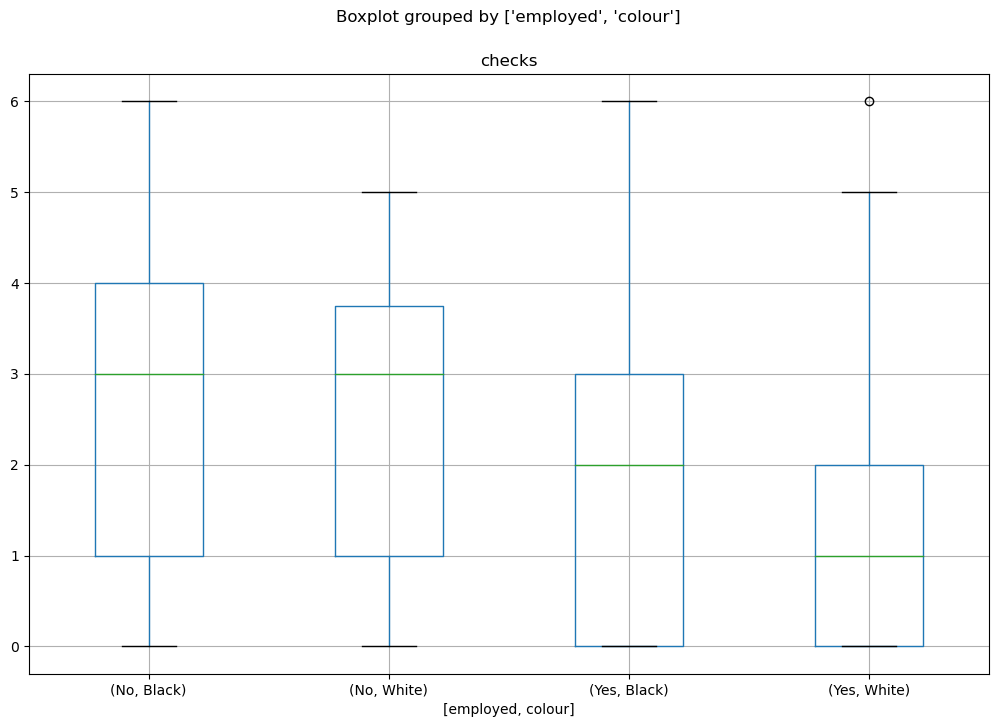

In [19]:
arrests.boxplot('checks', by=['employed', 'colour'], figsize=(12, 8))
plt.show()

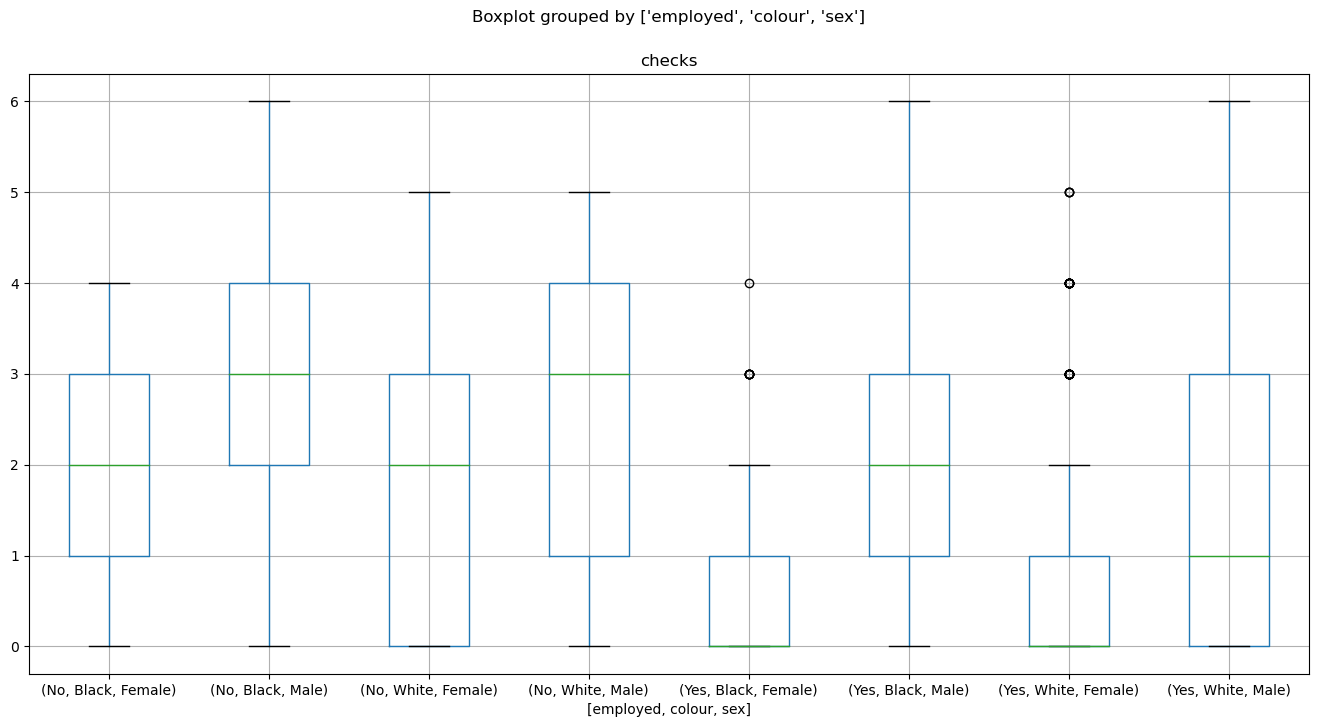

In [21]:
arrests.boxplot('checks', by=['employed', 'colour', 'sex'], figsize=(16, 8))
plt.show()

I made age groups for use in future analysis.  I tried two methods when doing so then compared the results to make sure that they were the same.

In [15]:
arrests['age_group'] = ''

In [16]:
arrests.loc[(arrests.age < 21), 'age_group'] = 'under_20'
arrests.loc[(arrests.age >= 20) & (arrests.age < 30), 'age_group'] = '20s'
arrests.loc[(arrests.age >= 30) & (arrests.age < 40), 'age_group'] = '30s'
arrests.loc[(arrests.age >= 40) & (arrests.age < 50), 'age_group'] = '40s'
arrests.loc[(arrests.age >= 50) & (arrests.age < 60), 'age_group'] = '50s'
arrests.loc[(arrests.age >= 60) & (arrests.age < 70), 'age_group'] = '60s'

In [17]:
arrests

,released,colour,year,age,sex,employed,citizen,checks,age_group
1,Yes,White,2002,21,Male,Yes,Yes,3,20s
2,No,Black,1999,17,Male,Yes,Yes,3,under_20
3,Yes,White,2000,24,Male,Yes,Yes,3,20s
4,No,Black,2000,46,Male,Yes,Yes,1,40s
5,Yes,Black,1999,27,Female,Yes,Yes,1,20s
...,...,...,...,...,...,...,...,...,...
5222,Yes,White,2000,17,Male,Yes,Yes,0,under_20
5223,Yes,White,2000,21,Female,Yes,Yes,0,20s
5224,Yes,Black,1999,21,Female,Yes,Yes,1,20s
5225,No,Black,1998,24,Male,Yes,Yes,4,20s


In [18]:
bins= [0, 20, 30, 40, 50, 60, 70]  
labels = ['under_20', '20s', '30s', '40s', '50s', '60s']
arrests['age_range'] = pd.cut(arrests['age'], bins=bins, labels=labels, right=False)
arrests

,released,colour,year,age,sex,employed,citizen,checks,age_group,age_range
1,Yes,White,2002,21,Male,Yes,Yes,3,20s,20s
2,No,Black,1999,17,Male,Yes,Yes,3,under_20,under_20
3,Yes,White,2000,24,Male,Yes,Yes,3,20s,20s
4,No,Black,2000,46,Male,Yes,Yes,1,40s,40s
5,Yes,Black,1999,27,Female,Yes,Yes,1,20s,20s
...,...,...,...,...,...,...,...,...,...,...
5222,Yes,White,2000,17,Male,Yes,Yes,0,under_20,under_20
5223,Yes,White,2000,21,Female,Yes,Yes,0,20s,20s
5224,Yes,Black,1999,21,Female,Yes,Yes,1,20s,20s
5225,No,Black,1998,24,Male,Yes,Yes,4,20s,20s


In [19]:
arrests['age_range'].equals(arrests['age_group'])

False

In [20]:
arrests.loc[arrests['age_range'] != arrests['age_group']]

,released,colour,year,age,sex,employed,citizen,checks,age_group,age_range


In [21]:
arrests = arrests.drop('age_group', axis=1)
arrests.rename(columns={"age_range": "age_group"})

,released,colour,year,age,sex,employed,citizen,checks,age_group
1,Yes,White,2002,21,Male,Yes,Yes,3,20s
2,No,Black,1999,17,Male,Yes,Yes,3,under_20
3,Yes,White,2000,24,Male,Yes,Yes,3,20s
4,No,Black,2000,46,Male,Yes,Yes,1,40s
5,Yes,Black,1999,27,Female,Yes,Yes,1,20s
...,...,...,...,...,...,...,...,...,...
5222,Yes,White,2000,17,Male,Yes,Yes,0,under_20
5223,Yes,White,2000,21,Female,Yes,Yes,0,20s
5224,Yes,Black,1999,21,Female,Yes,Yes,1,20s
5225,No,Black,1998,24,Male,Yes,Yes,4,20s


The first few times I compared them, I discovered errors I had made in the first method.  While I was able to correct these errors, it seemed clear that the second method worked better for me, so I dropped the column created by the first method.

In [22]:
arrests["released"].unique()

array(['Yes', 'No'], dtype=object)

In [23]:
arrests["colour"].unique()

array(['White', 'Black'], dtype=object)

In [24]:
arrests["year"].unique()

array([2002, 1999, 2000, 1998, 2001, 1997], dtype=int64)

In [25]:
arrests["age"].unique()

array([21, 17, 24, 46, 27, 16, 40, 34, 23, 30, 18, 42, 26, 25, 45, 20, 32,
       14, 15, 49, 29, 28, 19, 35, 22, 39, 53, 44, 33, 48, 36, 38, 31, 41,
       37, 12, 43, 52, 47, 54, 13, 64, 51, 50, 66, 59, 60, 55, 61, 62, 56,
       57, 58], dtype=int64)

In [26]:
arrests["sex"].unique()

array(['Male', 'Female'], dtype=object)

In [27]:
arrests["employed"].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
arrests["citizen"].unique()

array(['Yes', 'No'], dtype=object)

In [29]:
arrests["checks"].unique()

array([3, 1, 0, 4, 2, 5, 6], dtype=int64)

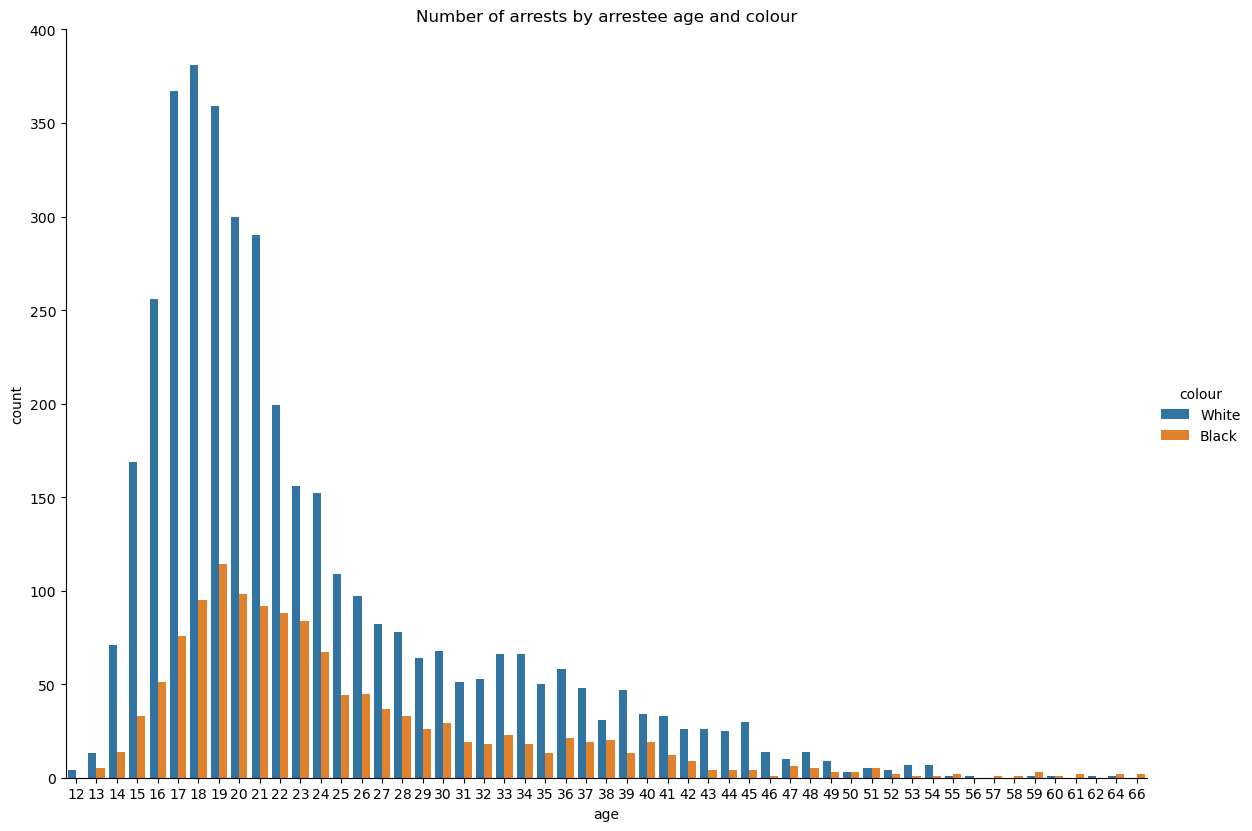

In [30]:
sns.catplot(x = 'age', hue = 'colour', data = arrests, kind = "count", height=8.27, aspect = 11.7/8.27).set(title = 'Number of arrests by arrestee age and colour')

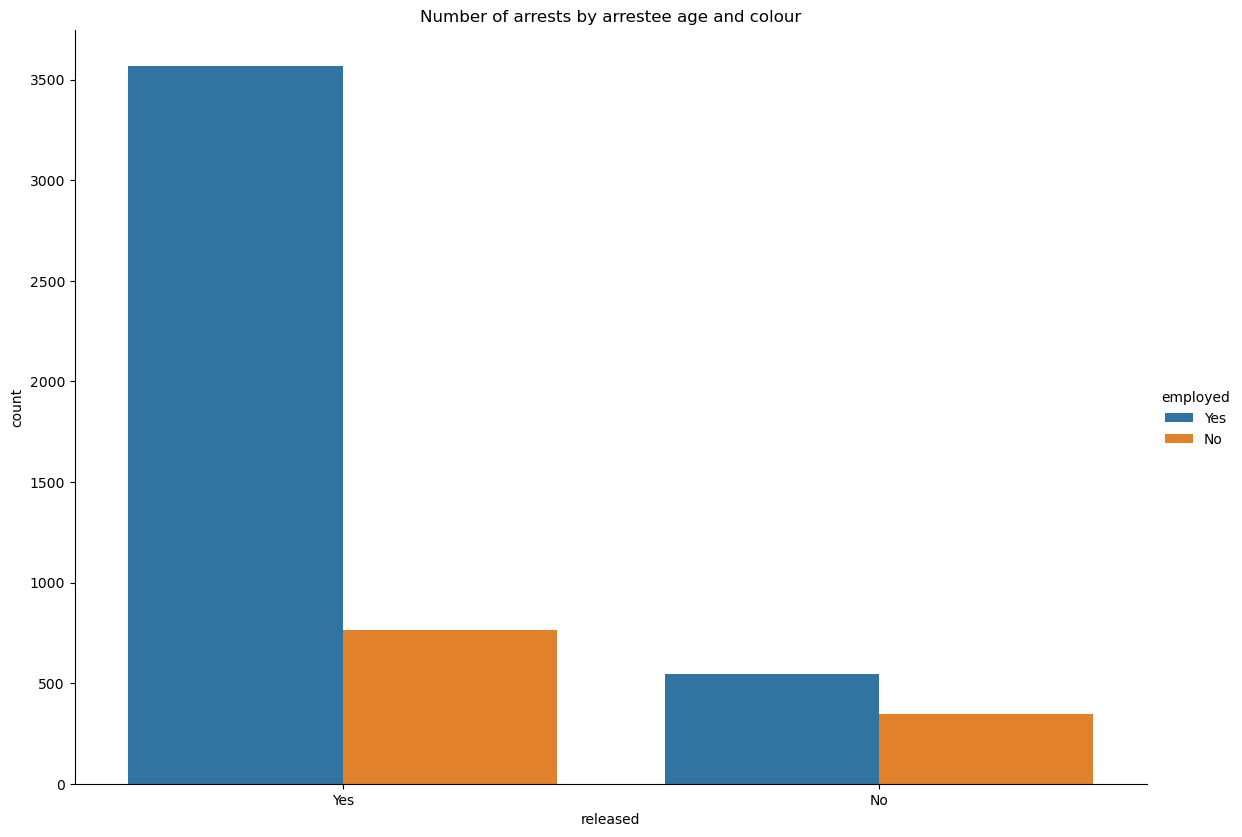

In [62]:
sns.catplot(x = 'released', hue = 'employed', data = arrests, kind = "count", height=8.27, aspect = 11.7/8.27).set(title = 'Number of arrests by arrestee age and colour')

In [22]:
grouped_data = {'group': ['white', 'black', 'female', 'male', 'employed', 'unemployed', 'non-citizen', 'citizen'],
                'average_checks': [1.485018, 2.099379, 1.092551, 1.686807, 1.441742, 2.354260, 1.762646, 1.614590],
                'average_age': [23.526409, 24.825311, 23.532731, 23.875601, 23.341279, 25.709417, 25.299611, 23.595062],
                'proportion_released': [0.858050, 0.741460, 0.857788, 0.826678, 0.867915, 0.686996, 0.725032, 0.847363]}


group_df = pd.DataFrame(grouped_data)

In [ ]:
groups = {'colour': ['black', 'white'], 'sex':['female', 'male'], 'employment':['unemployed', 'employed'], 'citizen':['yes', 'no']}

In [24]:
group_df

,group,average_checks,average_age,proportion_released
0,white,1.485018,23.526409,0.858050
1,black,2.099379,24.825311,0.741460
2,female,1.092551,23.532731,0.857788
3,male,1.686807,23.875601,0.826678
4,employed,1.441742,23.341279,0.867915
5,unemployed,2.354260,25.709417,0.686996
6,non-citizen,1.762646,25.299611,0.725032
7,citizen,1.614590,23.595062,0.847363


In [32]:
chks = group_df.sort_values('average_checks')

<AxesSubplot: xlabel='group'>

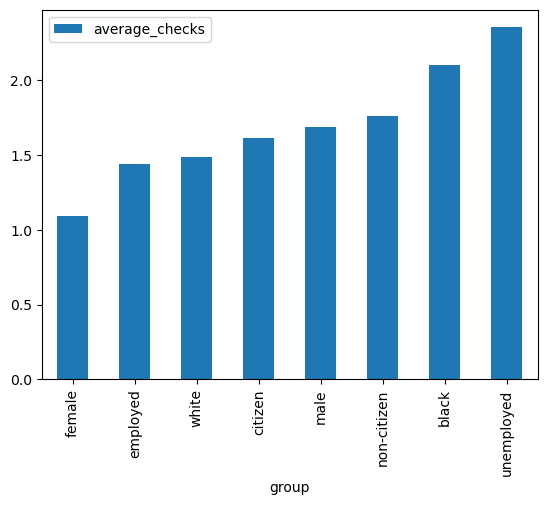

In [33]:
chks.plot.bar(x='group', y='average_checks')

In [34]:
age = group_df.sort_values('average_age')

<AxesSubplot: xlabel='group'>

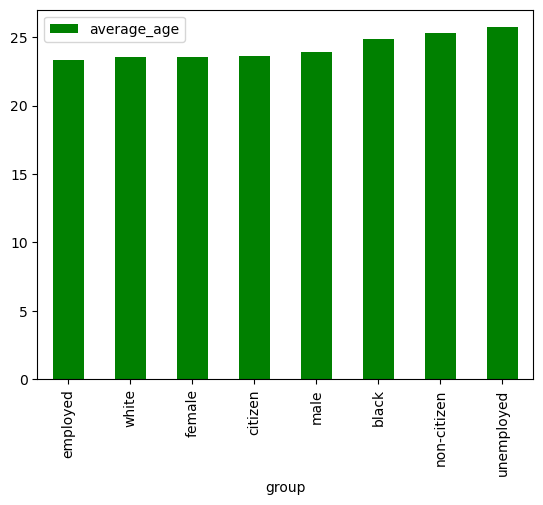

In [36]:
age.plot.bar(x='group', y='average_age', color = 'green')

In [37]:
rlsd = group_df.sort_values('proportion_released')

<AxesSubplot: xlabel='group'>

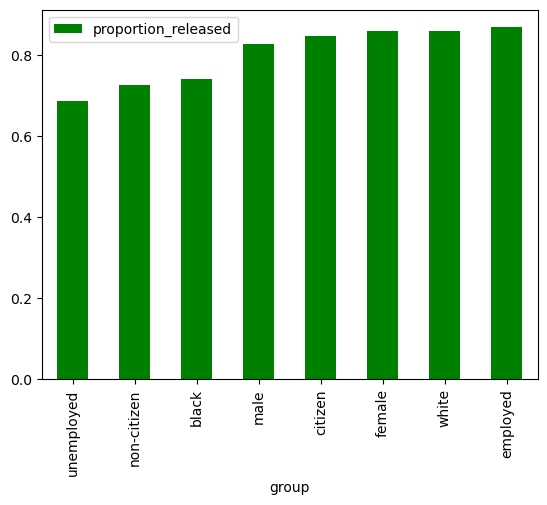

In [41]:
rlsd.plot.bar(x='group', y='proportion_released', color = 'green')

## Multiple linear regression model

In [31]:
dums = pd.get_dummies(arrests, columns=['colour', 'sex', 'citizen', 'released', 'employed'])

df_new = pd.concat([arrests, dums], axis=1)
print(df_new)

     released colour  year  age     sex employed citizen  checks age_range  \
1         Yes  White  2002   21    Male      Yes     Yes       3       20s   
2          No  Black  1999   17    Male      Yes     Yes       3  under_20   
3         Yes  White  2000   24    Male      Yes     Yes       3       20s   
4          No  Black  2000   46    Male      Yes     Yes       1       40s   
5         Yes  Black  1999   27  Female      Yes     Yes       1       20s   
...       ...    ...   ...  ...     ...      ...     ...     ...       ...   
5222      Yes  White  2000   17    Male      Yes     Yes       0  under_20   
5223      Yes  White  2000   21  Female      Yes     Yes       0       20s   
5224      Yes  Black  1999   21  Female      Yes     Yes       1       20s   
5225       No  Black  1998   24    Male      Yes     Yes       4       20s   
5226      Yes  White  1999   16    Male      Yes     Yes       3  under_20   

      year  ...  colour_Black  colour_White sex_Female  sex_Mal

In [32]:
dums = df_new.loc[:,~df_new.columns.duplicated()].copy()

In [33]:
dums.dtypes

released          object
colour            object
year               int64
age                int64
sex               object
employed          object
citizen           object
checks             int64
age_range       category
colour_Black       uint8
colour_White       uint8
sex_Female         uint8
sex_Male           uint8
citizen_No         uint8
citizen_Yes        uint8
released_No        uint8
released_Yes       uint8
employed_No        uint8
employed_Yes       uint8
dtype: object

In [34]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'uint8']

arrests_num = dums.select_dtypes(include=numerics)

In [35]:
arrests_num

,year,age,checks,colour_Black,colour_White,sex_Female,sex_Male,citizen_No,citizen_Yes,released_No,released_Yes,employed_No,employed_Yes
1,2002,21,3,0,1,0,1,0,1,0,1,0,1
2,1999,17,3,1,0,0,1,0,1,1,0,0,1
3,2000,24,3,0,1,0,1,0,1,0,1,0,1
4,2000,46,1,1,0,0,1,0,1,1,0,0,1
5,1999,27,1,1,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5222,2000,17,0,0,1,0,1,0,1,0,1,0,1
5223,2000,21,0,0,1,1,0,0,1,0,1,0,1
5224,1999,21,1,1,0,1,0,0,1,0,1,0,1
5225,1998,24,4,1,0,0,1,0,1,1,0,0,1


In [60]:
X = arrests_num.drop('released_Yes',axis= 1)
y = arrests_num['released_Yes']

In [62]:
X.shape

(5226, 12)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

In [46]:
pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline.fit(X_train, y_train)
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
predictions = model.predict(X_test)

In [47]:
print(
  'mean_squared_error : ', mean_squared_error(y_test, y_test_pred))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_test_pred))

mean_squared_error :  4.3439546419117815e-32
mean_absolute_error :  1.38636267998473e-16


In [69]:
sns.scatterplot(x=X.drop('age', axis=1).index, y=y, hue=X.values)

ValueError: Per-column arrays must each be 1-dimensional

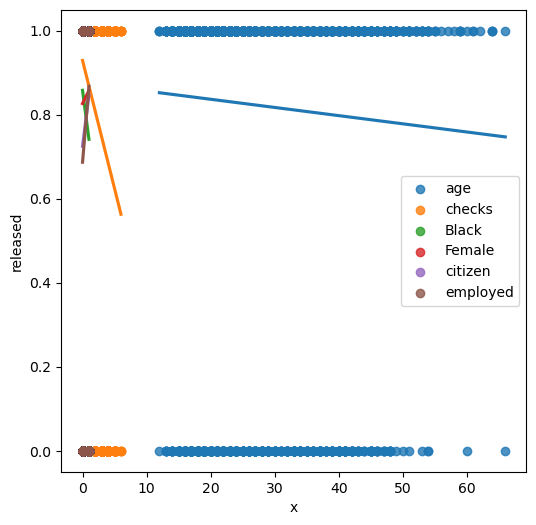

<AxesSubplot: xlabel='released_Yes'>

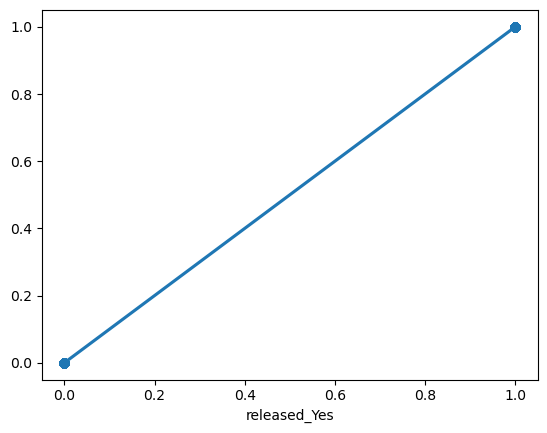

In [48]:
fig, ax = plt.subplots(figsize=(6, 6))

# add the plots for each dataframe
sns.regplot(x='age', y='released_Yes', data=arrests_num, fit_reg=True, ci=None, ax=ax, label='age')
sns.regplot(x='checks', y='released_Yes', data=arrests_num, fit_reg=True, ci=None, ax=ax, label='checks')
sns.regplot(x='colour_Black', y='released_Yes', data=arrests_num, fit_reg=True, ci=None, ax=ax, label='Black')
sns.regplot(x='sex_Female', y='released_Yes', data=arrests_num, fit_reg=True, ci=None, ax=ax, label='Female')
sns.regplot(x='citizen_Yes', y='released_Yes', data=arrests_num, fit_reg=True, ci=None, ax=ax, label='citizen')
sns.regplot(x='employed_Yes', y='released_Yes', data=arrests_num, fit_reg=True, ci=None, ax=ax, label='employed')


ax.set(ylabel='released', xlabel='x')
ax.legend()
plt.show()

sns.regplot(x=y_test, y=y_test_pred)

KeyError: "None of [Index(['x', 'y'], dtype='object')] are in the [columns]"

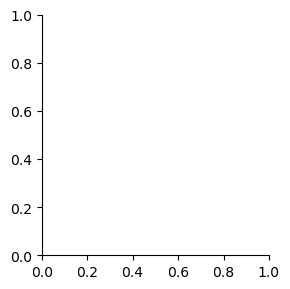

In [52]:
# sns.lmplot('x1', 'y1', df1, fit_reg=True, ci = None)
# sns.lmplot('x2', 'y2', df2, fit_reg=True, ci = None)
df = pd.concat([arrests_num.rename(columns={'age':'x','released_Yes':'y'})
                .join(pd.Series(['arrests_num']*len(arrests_num), name='df')), 
                arrests_num.rename(columns={'colour_Black':'x','released_Yes':'y'})
                .join(pd.Series(['colour_Black']*len(arrests_num), name='df')), 
                arrests_num.rename(columns={'sex_Female':'x','released_Yes':'y'})
                .join(pd.Series(['sex_Female']*len(arrests_num), name='df')), 
                arrests_num.rename(columns={'citizen_Yes':'x','released_Yes':'y'})
                .join(pd.Series(['citizen_Yes']*len(arrests_num), name='df')), 
                arrests_num.rename(columns={'employed_Yes':'x','released_Yes':'y'})
                .join(pd.Series(['employed_Yes']*len(arrests_num), name='df')), 
                arrests_num.rename(columns={'checks':'x','released_Yes':'y'})
                .join(pd.Series(['checks']*len(arrests_num), name='df'))],
               ignore_index=True)

pal = dict(df1="red", df2="blue")
g = sns.FacetGrid(df, hue='df', palette=pal, size=5);
g.map(plt.scatter, "x", "y", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.map(sns.regplot, "x", "y", ci=None, robust=1)
g.add_legend();

In [80]:
# turn columns into lists for future use

co = list(set(arrests['colour']))
e = list(set(arrests['employed']))
s = list(set(arrests['sex']))
r = list(set(arrests['released']))
ci = list(set(arrests['citizen']))

In [81]:
len(co)

2

In [74]:
y = list(set(arrests['year']))
a = list(set(arrests['age']))
ch = list(set(arrests['checks']))

In [75]:
# create categories merging colour and sex

BM = arrests[ ((arrests['colour'] == 'Black' ) & (arrests['sex'] == 'Male'))]
BF = arrests[ ((arrests['colour'] == 'Black' ) & (arrests['sex'] == 'Female'))]
WM = arrests[ ((arrests['colour'] == 'White' ) & (arrests['sex'] == 'Male'))]
WF = arrests[ ((arrests['colour'] == 'White' ) & (arrests['sex'] == 'Female'))]

In [77]:
df_dic = {'colour': co, 'employed': e, 'sex': s, 'released': r, 'year': y, 'age': a, 'checks': c, 'citizen': ci}
graph_df = pd.DataFrame(data=df_dic)
graph_df2 = graph_df.melt(['colour', 'employed', 'sex', 'released', 'citizen'])
graph_df2['Citizen_Employed_Released'] = graph_df2['citizen'] + ', ' + graph_df2['employed'] + ', ' + graph_df2['released']

sns.set_style(style='white')
g = sns.catplot(
    data=df2,
    x='age',
    y='checks',
    hue='PP_DD',
    col='Citizen_Employed_Released',
    col_wrap=2,
    col_order=['BM', 'BF', 'WM', 'WF'],
    kind='bar',
    ci=None,
    sharey=False, sharex=False,
    height=3, aspect=1.5)
g.fig.subplots_adjust(left=0.06, bottom=0.09)
plt.show()

ValueError: All arrays must be of the same length

In [82]:
table = pd.pivot_table(arrests, index =['released', 'citizen', 'employed', 'checks', 'age'], columns = ['colour', 'sex'])

C:\Users\crathgeb-pc\AppData\Local\Temp\ipykernel_25928\58087831.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  table = pd.pivot_table(arrests, index =['released', 'citizen', 'employed', 'checks', 'age'], columns = ['colour', 'sex'])


In [ ]:
import numpy as np
import pylab as pl

class Radar(object):

    def __init__(self, fig, titles, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.95, 0.95]

        self.n = len(titles)
        self.angles = np.arange(90, 90+360, 360.0/self.n)
        self.axes = [fig.add_axes(rect, projection="polar", label="axes%d" % i) 
                         for i in range(self.n)]

        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=titles, fontsize=14)

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.set_rgrids(range(1, 6), angle=angle, labels=label)
            ax.spines["polar"].set_visible(False)
            ax.set_ylim(0, 5)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)



fig = pl.figure(figsize=(6, 6))

titles = [('# released', '# employed', '# citizens', 'age', 'checks')

labels = [
    list("abcde"), list("12345"), list("uvwxy"), 
    ["one", "two", "three", "four", "five"],
    list("jklmn")
]

radar = Radar(fig, titles, labels)
radar.plot([1, 3, 2, 5, 4],  "-", lw=2, color="b", alpha=0.4, label="first")
radar.plot([2.3, 2, 3, 3, 2],"-", lw=2, color="r", alpha=0.4, label="second")
radar.plot([3, 4, 3, 4, 2], "-", lw=2, color="g", alpha=0.4, label="third")
radar.ax.legend()

In [ ]:
arrests_num['age'].shape

In [ ]:
arrests_num

## Correlation

In [ ]:
import seaborn as sns
ax = sns.heatmap(arrests_num.corr(), annot=True)

In [ ]:
sns.pairplot(arrests)

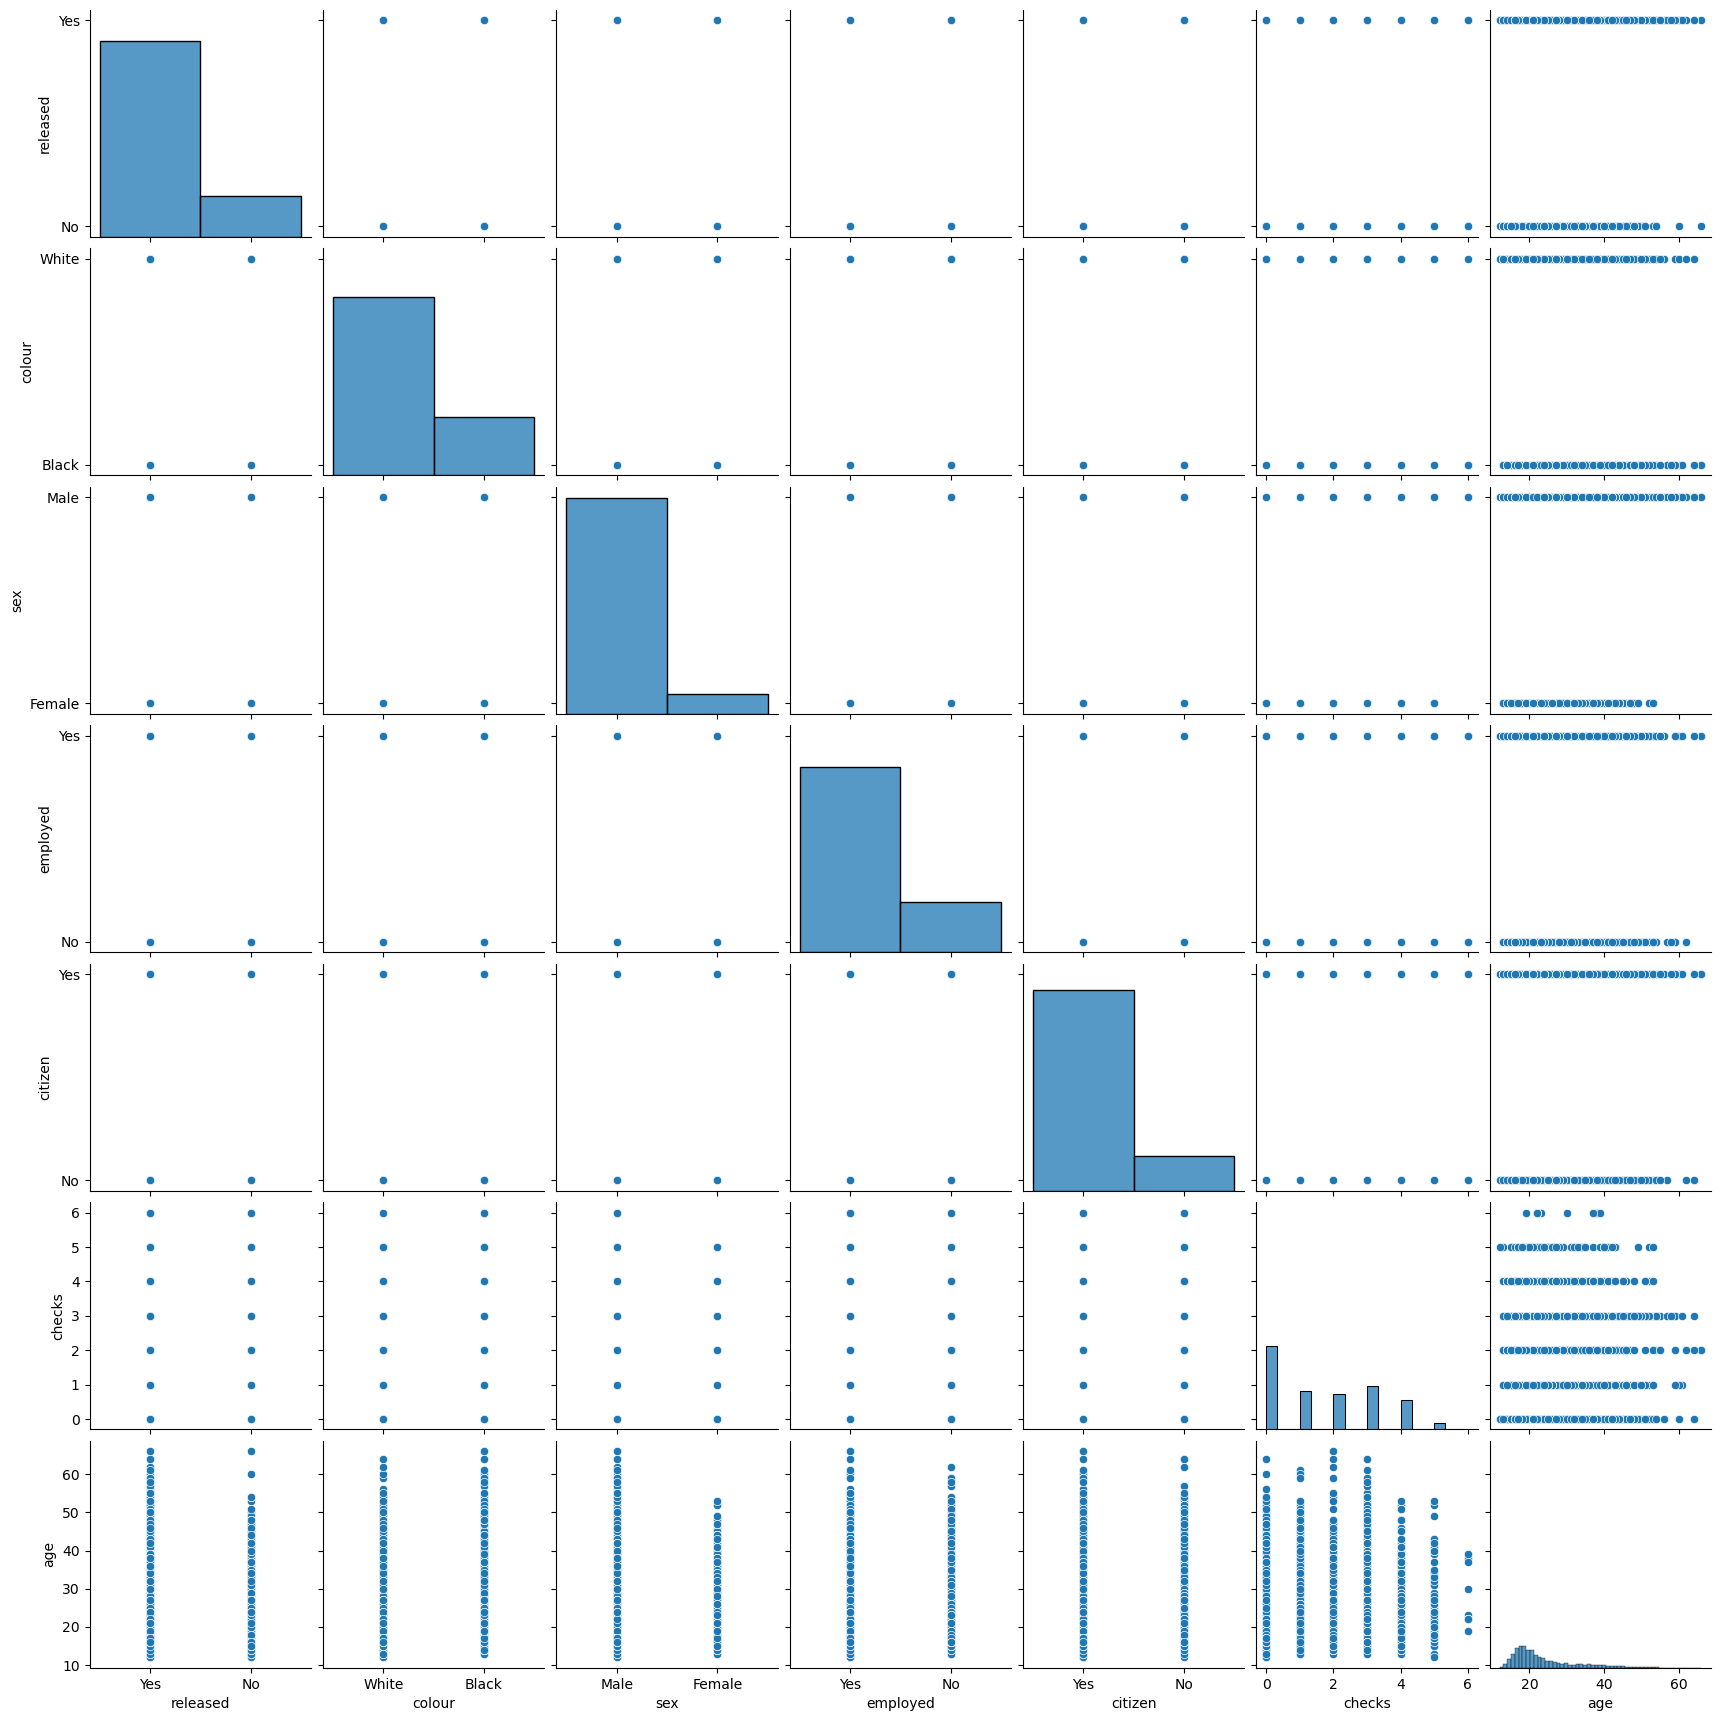

In [43]:
sns.pairplot(arrests, vars= ['released', 'colour', 'sex', 'employed', 'citizen', 'checks', 'age'])

In [ ]:
# there appear to be possible correlations between sex and age, checks and age, and released and age.  Possibly also sex and checks, citizen and sex, 

<AxesSubplot: xlabel='age', ylabel='checks'>

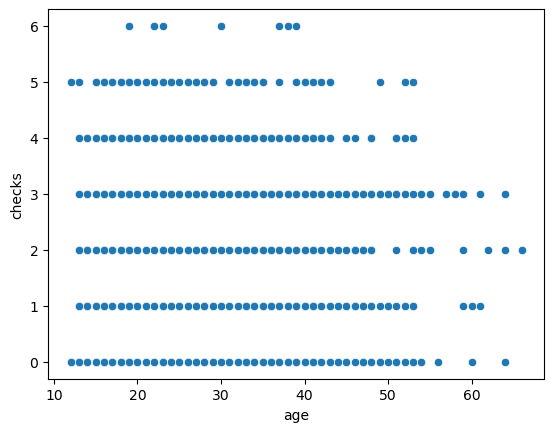

In [48]:
sns.scatterplot(x='age', y='checks', data=arrests)

In [ ]:
#models for factor importance

In [ ]:
arrests

#### Attempts to accertain percentages of various levels for each category (ex. percentage of those released who were black vs white, male vs. female, etc) Possibly use dummy variables?

In [84]:
released = arrests.pivot(index='released', aggfunc= {'colour': 'mean', 'sex': 'sum', 'sex': 'sum', 'sex': 'sum'}, columns=['colour', 'sex', 'citizen', 'age_group'])['value']

TypeError: pivot() got an unexpected keyword argument 'aggfunc'

In [ ]:
color_data

In [90]:
X = dums.drop("released",1)   #Feature Matrix
y = dums["released"]          #Target Variable
dums.head()

C:\Users\crathgeb-pc\AppData\Local\Temp\ipykernel_25928\3534970290.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = dums.drop("released",1)   #Feature Matrix


,released,colour,year,age,sex,employed,citizen,checks,age_range,colour_Black,colour_White,sex_Female,sex_Male,citizen_No,citizen_Yes,released_No,released_Yes,employed_No,employed_Yes
1,Yes,White,2002,21,Male,Yes,Yes,3,20s,0,1,0,1,0,1,0,1,0,1
2,No,Black,1999,17,Male,Yes,Yes,3,under_20,1,0,0,1,0,1,1,0,0,1
3,Yes,White,2000,24,Male,Yes,Yes,3,20s,0,1,0,1,0,1,0,1,0,1
4,No,Black,2000,46,Male,Yes,Yes,1,40s,1,0,0,1,0,1,1,0,0,1
5,Yes,Black,1999,27,Female,Yes,Yes,1,20s,1,0,1,0,0,1,0,1,0,1


In [102]:
arrests.value_counts()

released  colour  year  age  sex   employed  citizen  checks  age_range
Yes       White   2000  18   Male  Yes       Yes      0       under_20     37
                        17   Male  Yes       Yes      0       under_20     37
                  1999  19   Male  Yes       Yes      0       under_20     34
                  2001  18   Male  Yes       Yes      0       under_20     30
                  1999  17   Male  Yes       Yes      0       under_20     29
                                                                           ..
          Black   1999  19   Male  Yes       No       6       under_20      1
                                             Yes      1       under_20      1
                                                      4       under_20      1
                        20   Male  No        No       0       20s           1
          White   2002  56   Male  Yes       Yes      0       50s           1
Length: 2879, dtype: int64

In [105]:
arrests['colour_counts'] = arrests.groupby(['released'])['colour'].transform('count')

In [118]:
z = arrests.groupby('colour').released.value_counts()
y = arrests.groupby('sex').released.value_counts()
x = arrests.groupby('employed').released.value_counts()
w = arrests.groupby('citizen').released.value_counts()
q = arrests.groupby('checks').released.value_counts()

z1 = z.to_dict() #converts to dictionary
y1 = y.to_dict()
x1 = x.to_dict()
w1 = w.to_dict()
q1 = q.to_dict()

arrests['colour_counts'] = arrests['colour'].map(z1)
arrests['sex_counts'] = arrests['sex'].map(z1)
arrests['employed_counts'] = arrests['employed'].map(z1) 
arrests['citizen_counts'] = arrests['citizen'].map(z1)
arrests['checks_counts'] = arrests['checks'].map(z1) 

In [117]:
arrests.groupby('colour').released.value_counts()

colour  released
Black   Yes          955
        No           333
White   Yes         3379
        No           559
Name: released, dtype: int64

In [136]:
arrests.groupby('sex').released.value_counts()

sex     released
Female  Yes          380
        No            63
Male    Yes         3954
        No           829
Name: released, dtype: int64

In [137]:
arrests.groupby('employed').released.value_counts()

employed  released
No        Yes          766
          No           349
Yes       Yes         3568
          No           543
Name: released, dtype: int64

In [138]:
arrests.groupby('citizen').released.value_counts()

citizen  released
No       Yes          559
         No           212
Yes      Yes         3775
         No           680
Name: released, dtype: int64

In [123]:
arrests['colour_counts'] = arrests['colour'].map(arrests.groupby('colour').released.value_counts())

In [128]:
new = pd.DataFrame()

In [129]:
new['colour_counts'] = arrests.groupby('colour').released.value_counts()

In [130]:
new['sex_counts'] = arrests.groupby('sex').released.value_counts()

In [52]:
prop = pd.DataFrame()

In [53]:
prop['']

KeyError: ''

In [54]:
data = {'category': ['colour', 'colour', 'sex', 'sex', 'employment_status', 'employment_status', 'citizenship_status', 'citizenship_status'], 
        'label': ['black', 'white', 'female', 'male', 'employed', 'unemployed', 'citizen', 'not_citizen'],
        'number_released': [955, 3379, 380, 3954, 3568, 766, 3775, 559],
        'total_number': [1288, 3938, 443, 4783, 4111, 1115, 4455, 771]}
  
# Create DataFrame
prop = pd.DataFrame(data)
  
# Print the output.
prop

,category,label,number_released,total_number
0,colour,black,955,1288
1,colour,white,3379,3938
2,sex,female,380,443
3,sex,male,3954,4783
4,employment_status,employed,3568,4111
5,employment_status,unemployed,766,1115
6,citizenship_status,citizen,3775,4455
7,citizenship_status,not_citizen,559,771


In [55]:
prop['proportion_released'] = prop['number_released']/prop['total_number']

In [56]:
prop

,category,label,number_released,total_number,proportion_released
0,colour,black,955,1288,0.741460
1,colour,white,3379,3938,0.858050
2,sex,female,380,443,0.857788
3,sex,male,3954,4783,0.826678
4,employment_status,employed,3568,4111,0.867915
5,employment_status,unemployed,766,1115,0.686996
6,citizenship_status,citizen,3775,4455,0.847363
7,citizenship_status,not_citizen,559,771,0.725032


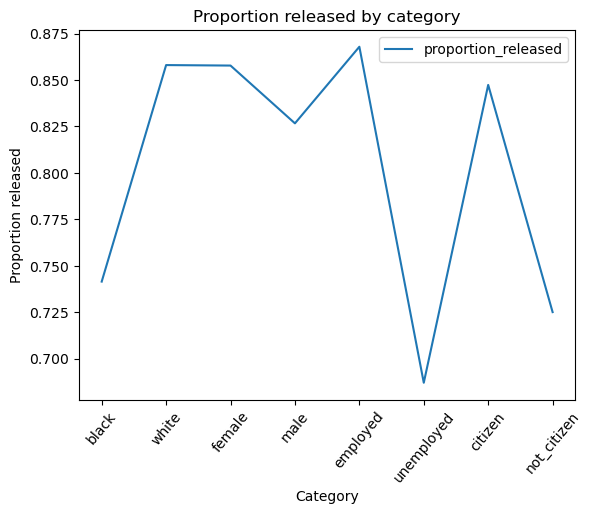

In [150]:
prop.plot(x='label', y = 'number_released')
plt.xticks(rotation = 50)
plt.xlabel("Category")
plt.ylabel("Proportion released")
plt.title("Proportion released by category")
plt.show()

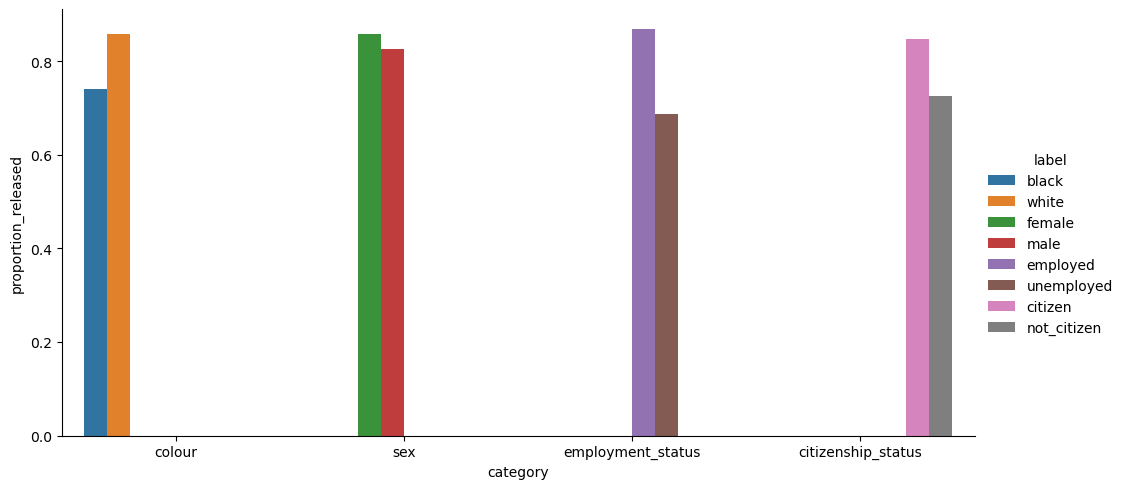

In [58]:
sns.catplot(x = "category",       # x variable name
            y = "proportion_released",       # y variable name
            hue = "label",  # group variable name
            data = prop,     # dataframe to plot
            kind = "bar", height=5, aspect=2)

Text(0.5, 1.0, 'Proportion released by category')

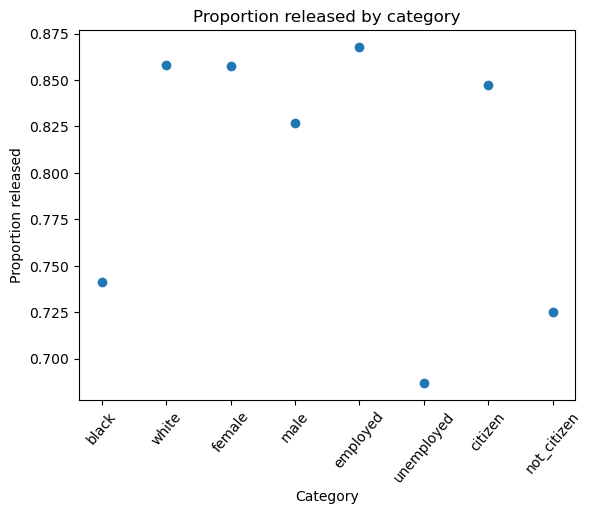

In [167]:
plt.scatter(data=prop, x='label', y='proportion_released')
plt.xticks(rotation = 50)
plt.xlabel("Category")
plt.ylabel("Proportion released")
plt.title("Proportion released by category")

Looking at these visualizations, it is apparent that compared to other categories, black, unemployed, and not citizen have lower proportions of arrestees released than all other categories.

C:\Users\crathgeb-pc\AppData\Local\Temp\ipykernel_25928\2158783739.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = dums.corr()


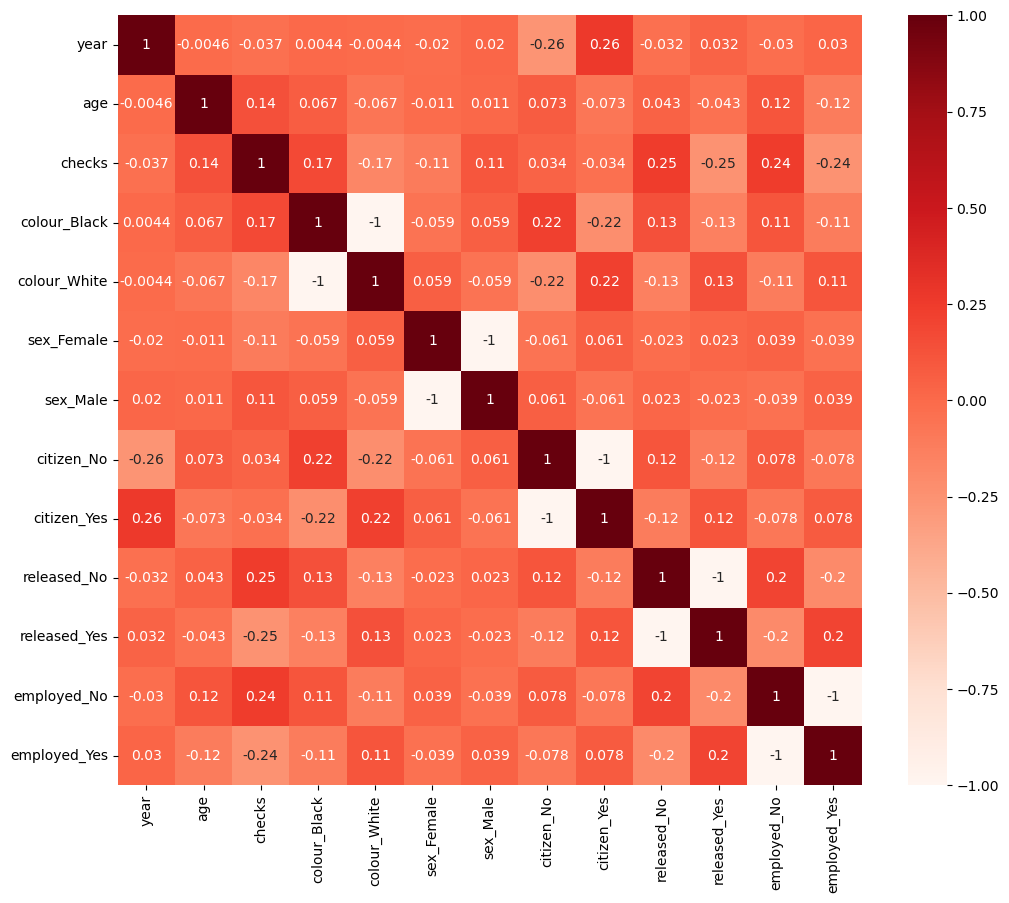

In [91]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = dums.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [100]:
#Correlation with output variable
cor_target = abs(cor["released_Yes"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features

checks          0.249592
colour_Black    0.133546
colour_White    0.133546
citizen_No      0.115307
citizen_Yes     0.115307
released_No     1.000000
released_Yes    1.000000
employed_No     0.197002
employed_Yes    0.197002
Name: released_Yes, dtype: float64

In [101]:
#Correlation with output variable
cor_target = abs(cor["checks"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features

age             0.135079
checks          1.000000
colour_Black    0.172024
colour_White    0.172024
sex_Female      0.107546
sex_Male        0.107546
released_No     0.249592
released_Yes    0.249592
employed_No     0.242897
employed_Yes    0.242897
Name: checks, dtype: float64

In order of most correlated, released seems possibly correlated with checks, employment, colour, and citizenship, while checks seems possibly correlated with released, employment, colour, age, and sex.

In [ ]:
arrests['resorts_per_100kcapita'] = 100_000 * state_summary.resorts_per_state / state_summary.state_population
state_summary['resorts_per_100ksq_mile'] = 100_000 * state_summary.resorts_per_state / state_summary.state_area_sq_miles

In [ ]:
arrests['%'] = 100 * arrests['released'] / arrests.groupby('colour')['released'].transform('sum')

In [ ]:
arrests['year'].value_counts()

In [ ]:
arr_year = arrests.sort_values(by='year')

In [ ]:
arr_year.year.value_counts()[arr_year.year.unique()].plot(kind='bar')

In [ ]:
arrests['age'].value_counts()

In [ ]:
arr_age = arrests.sort_values(by='age')

In [ ]:
arr_age['age_counts'] = arr_age.groupby(['age'])['sex'].transform('count')

In [ ]:
arr_age

In [ ]:
means_stds = arr_age.groupby('colour')['age_counts'].agg(['mean','std']).reset_index()
arr_age = arr_age.merge(means_stds,on='colour')
arr_age['age_normalized'] = (arr_age['age'] - arr_age['mean']) / arr_age['std']

In [ ]:
arr_age

In [ ]:
groups = arr_age.groupby("colour") 
mean, std = groups.transform("mean"), groups.transform("std") 
normalized = (arr_age [mean.columns] - mean) / std

In [ ]:
white = arr_age[arr_age['colour']=='White']['age'].value_counts()
black = arr_age[arr_age['colour']=='Black']['age'].value_counts()

figure1 = plt.bar(range(len(white)), white, align='edge', width=0.4, label='White')
figure2 = plt.bar(range(len(black)), black, align='edge', width=-0.4, label='Black')
plt.legend()
plt.xticks(np.arange(len(white)), rotation=0)
plt.title("Number of arrests by age and race")

plt.show()

In [ ]:
arr_age.age.value_counts()[arr_age.age.unique()].plot(kind='bar', edgecolor='black')
plt.title("Number of arrests by age")
plt.xlabel("Age arrested")
plt.ylabel("Number of arrests")
fig = plt.gcf()
fig.set_size_inches(12, 6, forward=True)

In [ ]:
arrests['checks'].value_counts()

In [ ]:
arrests['colour'].value_counts()

In [ ]:
check

In [ ]:
check = arrests.groupby('colour')['checks'].value_counts()

In [ ]:
check = pd.DataFrame(
    arrests.groupby(['colour'])['checks'].value_counts()
).rename(
    columns={'checks': 'checks_by_color'}
).reset_index()

In [ ]:
check

In [ ]:
x=check['checks']
y=check['checks_by_color']
hue=check['colour']

sns.scatterplot(x = x, y = y, hue = hue, data = check)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

# add the plots for each dataframe
sns.regplot(x='checks', y='checks_by_color', data=white, fit_reg=True, ci=None, ax=ax, label='White prisoners')
sns.regplot(x='checks', y='checks_by_color', data=black, fit_reg=True, ci=None, ax=ax, label='Black prisoners')
ax.set(ylabel='Number of prisoners', xlabel='Number of previous checks')
ax.legend()
plt.show()

In [ ]:
white = check.loc[check['colour'] == 'White']
black = check.loc[check['colour'] == 'Black']

In [ ]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
white_binary = white[['checks', 'checks_by_color']]
 
# Taking only the selected two attributes from the dataset
white_binary.columns = ['checks', 'checks_by_color']
#display the first 5 rows
white_binary.head()

In [ ]:
black_binary = black[['checks', 'checks_by_color']]
 
# Taking only the selected two attributes from the dataset
black_binary.columns = ['checks', 'checks_by_color']
#display the first 5 rows
black_binary.head()

## Linear regression

In [ ]:
X = np.array(white_binary['checks']).reshape(-1, 1)
y = np.array(white_binary['checks_by_color']).reshape(-1, 1)
 
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array
# since each dataframe contains only one column
white_binary.dropna(inplace = True)
 
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
 
# Splitting the data into training and testing data
regr = LinearRegression()
 
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

In [ ]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
 
plt.show()
# Data scatter of predicted values

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

In [ ]:
X = np.array(black_binary['checks']).reshape(-1, 1)
y = np.array(black_binary['checks_by_color']).reshape(-1, 1)
 
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array
# since each dataframe contains only one column
black_binary.dropna(inplace = True)
 
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
 
# Splitting the data into training and testing data
regr = LinearRegression()
 
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

In [ ]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
 
plt.show()
# Data scatter of predicted values

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

In [ ]:
new = pd.DataFrame(
    arrests.groupby(['colour'])['checks'].value_counts()
).rename(
    columns={'checks': 'checks_by_color'}
).reset_index()

In [ ]:
new

In [ ]:
# Note: Here 'df1' refers to the dataframe 'user_record_access'
s = new.groupby('colour')['checks_by_color'].transform('sum')
new['proportion'] = new['checks_by_color'].div(s)

In [ ]:
new

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
bp = new.groupby('colour').plot(x = 'checks_by_color', kind='kde', ax=ax)

In [ ]:
fig, ax = plt.subplots()

x = new['checks']
y = new['proportion']
bar_labels = ['black', 'black', 'black', 'black', 'black', 'black', 'black', 'white', 'white', 'white', 'white', 'white', 'white', 'white']

ax.bar(x, y, label = bar_labels, edgecolor='black', color = ['black', 'black', 'black', 'black', 'black', 'black', 'black', 'white', 'white', 'white', 'white', 'white', 'white', 'white'])

ax.set_ylabel('Proportion of checks')
ax.set_title('Arrests by number of checks and color')
ax.legend(title='Color')

plt.show()

This graph shows that, when grouped by race, white prisoners are likely to have lower numbers of or zero previous checks, while black prisoners show a higher likelihood of having had more previous checks.

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

g = new.groupby('colour').plot(x = 'checks', y = 'proportion', ax = ax, kind = 'bar', label = 'colour')

In [ ]:
df = arrests.groupby('colour')['checks'].value_counts().rename_axis('checks').reset_index(name='counts')

In [ ]:
check

In [ ]:
check_counts = arrests.groupby('colour')['checks'].value_counts()

In [ ]:
check_vals = arrests

In [ ]:
check_vals['num'] = check_counts

In [ ]:
check_counts

In [ ]:
y = list(arrests.year)
plt.boxplot(y)
plt.show()

In [ ]:
arrests.boxplot('year', by='colour', figsize=(12, 8))
plt.show()

In [ ]:
y2 = list(arrests.age)
plt.boxplot(y2)
plt.show()

In [ ]:
arrests.boxplot('age', by='colour', figsize=(12, 8))
plt.show()

In [ ]:
y3 = list(arrests.checks)
plt.boxplot(y3)
plt.show()

In [ ]:
arrests.boxplot('checks', by='colour', figsize=(12, 8))
plt.show()

In [ ]:
arrests.groupby('colour')['checks'].value_counts().plot(kind='bar')

In [ ]:
a = arrests[['colour', 'checks']]

In [ ]:
bp = a.boxplot(by='colour')

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
arrests.groupby('colour').transform(lambda x: (x - x.mean()) / x.std())

In [ ]:
norm1

In [ ]:
normalize(X, norm='l2', *, axis=1, copy=True, return_norm=False)

In [ ]:
arrests.boxplot('avg_checks', figsize=(12, 8))
plt.show()

In [ ]:
sns.boxplot(norm.checks, groupby=norm.colour)

In [ ]:
arrests

In [ ]:
sns.boxplot(arrests.checks, groupby=arrests.colour)

In [ ]:
sns.boxplot(data = (arrests['checks'].value_counts(), arrests['colour']))

In [ ]:
sns.boxplot(data=pd.crosstab(arrests['checks'].value_counts(), arrests['colour']))

In [ ]:
df2 = arrests.groupby('colour')['checks'].value_counts()
sns.boxplot(x = df2.index.get_level_values('colour'), y = df2)

In [ ]:
arrests.boxplot(check_counts, by='colour', figsize=(12, 8))
plt.show()

In [ ]:
arrests.groupby(['colour']).mean()

In [ ]:
white = arrests.loc[numeric['colour'] == 'White']
black = arrests.loc[numeric['colour'] == 'Black'] 

In [ ]:
white = white[['year', 'age', 'checks']]
black = black[['year', 'age', 'checks']]

In [ ]:
white.head()

In [ ]:
val_counts = arrests ['colour'].value_counts ()
arrests.boxplot(val_counts, by='colour', figsize=(12, 8))

grps = pd.unique(arrests.group.values)
d_data = {grp:arrests[val_counts][arrests.group == grp] for grp in grps}

k = len(pd.unique(arrests.group))  # number of conditions
N = len(arrests.values)  # conditions times participants
n = arrests.groupby('colour').size()[0] #Participants in each condition

In [ ]:
from scipy.stats import f_oneway
 
# Perform ANOVA
f_statistic, p_value = f_oneway(white, black)
 
# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

In [ ]:
mod = ols('age ~ colour', data = arrests).fit()
anova = sm.stats.anova_lm(mod, type = 2)
print(anova)